<a href="https://colab.research.google.com/github/LiDeChi/langchain/blob/master/3_Sequential_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U langgraph
from typing import TypedDict
from langgraph.graph import StateGraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.2 MB/s eta 0:00:00


In [ ]:
class AgentState(TypedDict):
    name: str
    age: str
    final : str

In [ ]:
def first_node(state: AgentState) -> AgentState:
  """This is the first node of our sequence"""
  state["final"] = f"Hi {state['name']}! "
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node of our sequence"""
  state["final"] = state["final"] + f"You are {state['age']} years old"
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.add_edge("first_node", "second_node")

graph.set_entry_point("first_node")
graph.set_finish_point("second_node")

app = graph.compile()

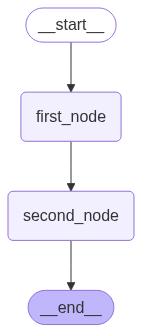

In [ ]:
#@title graph_mermaid
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"name": "Charlie","age":24})
print(result)

{'name': 'Charlie', 'age': 24, 'final': 'Hi Charlie! You are 24 years old'}


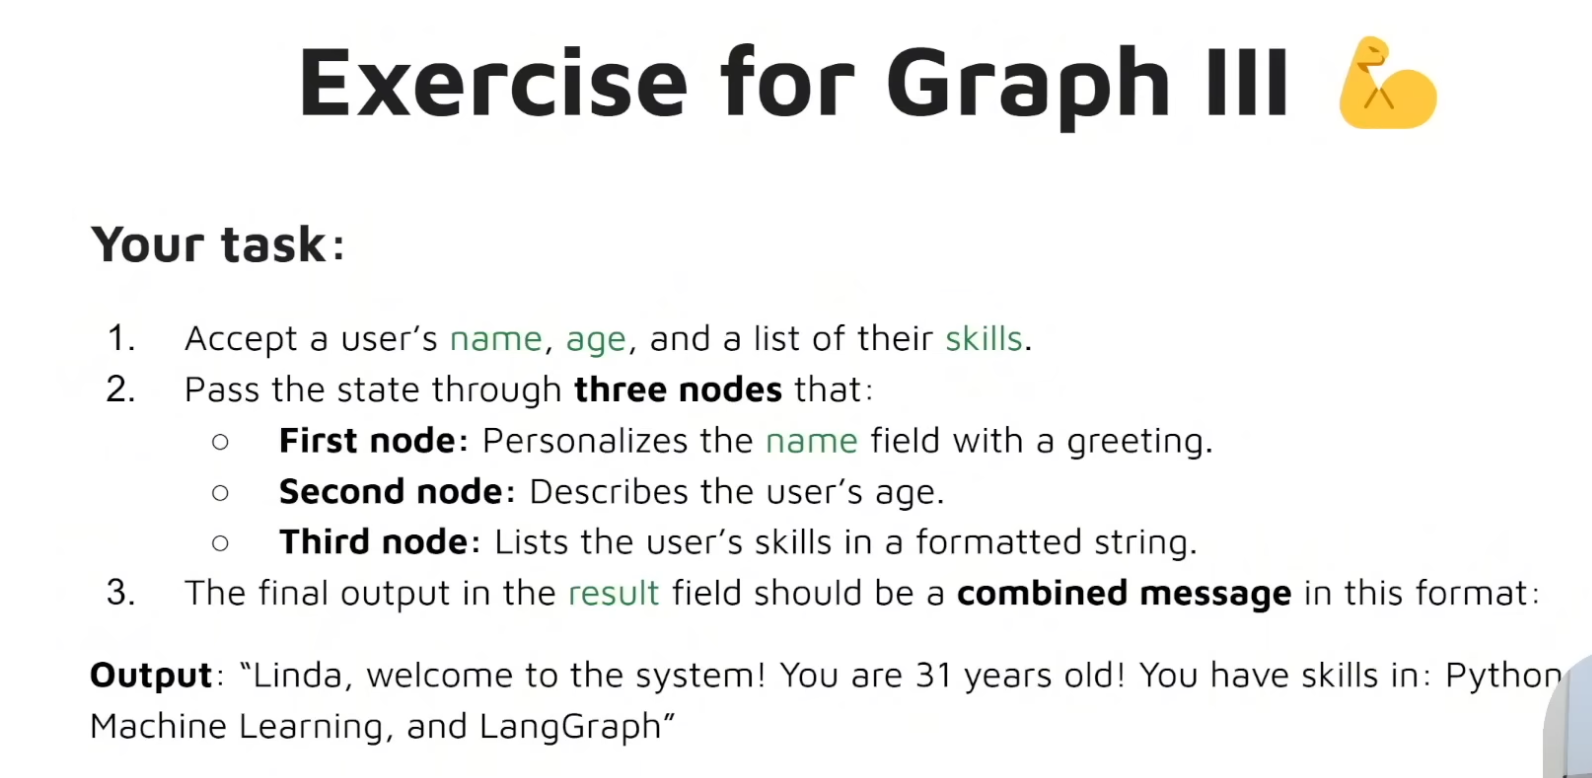